In [115]:
import warnings
warnings.filterwarnings("ignore")

1.Datasets contain structurd data used for analysis. We import them using 'pandas', a dataset library.
2.Combining datasets(merging) helps in gaining deeper insights. We use 'merge()' function in pandas to join multiple datasets

In [116]:
import pandas as pd

# Load the datasets
data1 = pd.read_csv(r'C:\Users\Madhavi\OneDrive\Desktop\ML-Workshop-master\PDS\Netflix Userbase.csv')
data2 = pd.read_csv(r'C:\Users\Madhavi\OneDrive\Desktop\ML-Workshop-master\PDS\amazon_prime_users.csv')

# Display the first 11 rows of each dataset
print("Netflix Userbase Dataset:")
print(data1.head(11))
print("\nAmazon Prime Userbase Dataset:")
print(data2.head(11))

# Merge the datasets on the 'Gender' column using an outer join
merged_data = pd.merge(data1, data2, how='outer', on='Gender')
print("\nMerged Dataset:")
print(merged_data.head())

# Concatenate the datasets along the rows
concatenation = pd.concat([data1, data2], axis=0)
print("\nConcatenated Dataset:")
print(concatenation)


Netflix Userbase Dataset:
    User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0         1             Basic               10  15-01-22          10-06-23   
1         2           Premium               15  05-09-21          22-06-23   
2         3          Standard               12  28-02-23          27-06-23   
3         4          Standard               12  10-07-22          26-06-23   
4         5             Basic               10  01-05-23          28-06-23   
5         6           Premium               15  18-03-22          27-06-23   
6         7          Standard               12  09-12-21          25-06-23   
7         8             Basic               10  02-04-23          24-06-23   
8         9          Standard               12  20-10-22          23-06-23   
9        10           Premium               15  07-01-23          22-06-23   
10       11             Basic               10  16-05-22          22-06-23   

           Country  Age  Gender      


## **Exploratory Data Analysis (EDA) on the Dataset**  

1. **Import Required Libraries**: We begin by importing essential libraries—NumPy, Matplotlib, Seaborn, and SciPy's `zscore` function—for data analysis and visualization.  
2. **Dataset Overview**: We use `.info()` to check the structure of the dataset and `.describe()` to get statistical summaries of numerical columns.  
3. **Handling Missing Values**:  
   - `.isnull().sum()` is used to identify missing values in each column.  
   - `.dropna()` removes rows containing missing values.  
   - `.fillna(100)` replaces missing values with 100.  
4. **Gender Distribution**: We analyze the distribution of 'Gender' values using `.value_counts()`.  
5. **Detecting Duplicates**:  
   - `.duplicated().sum()` checks for duplicate rows in the dataset.  
   - `.drop_duplicates()` removes duplicate entries to ensure data integrity.  


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

data1.info()
data1.describe()
data1.isnull().sum()
data1.dropna()
data1.fillna(100)
print(merged_data['Gender'].value_counts())
merged_data.duplicated().sum()
data1.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
Gender
Male      1566180
Female    1558680
Name: count, dtype: int64


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month



## **Visualizing Age vs. Subscription Type Using a Scatter Plot**

1. **Scatter Plot with Seaborn**:  
   - We use `sns.scatterplot()` to visualize the relationship between 'Age' and 'Subscription Type' in the `concatenation` DataFrame.
   - The `x` parameter is set to 'Age', and the `y` parameter is set to 'Subscription Type'.  

2. **Customizing the Plot**:  
   - `plt.xlabel('Age')` sets the x-axis label.  
   - `plt.ylabel('Subscription Type')` sets the y-axis label.  
   - `plt.title('Scatter Plot of Age vs Subscription Type')` gives the plot a meaningful title.  

3. **Displaying the Plot**:  
   - `plt.show()` renders the scatter plot, making it visible.  


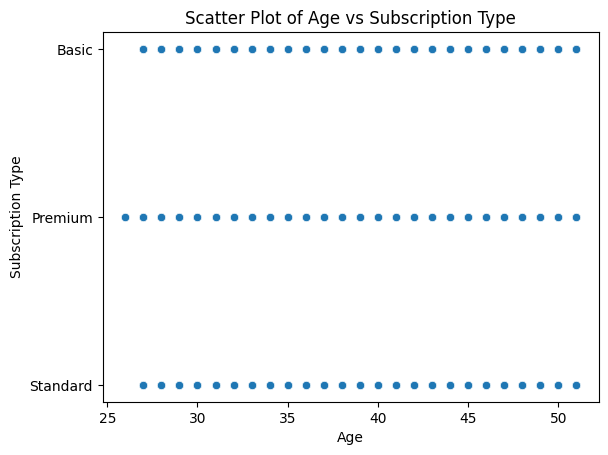

In [118]:
sns.scatterplot(data=concatenation, x='Age', y='Subscription Type')
plt.xlabel('Age')
plt.ylabel('Subscription Type')
plt.title('Scatter Plot of Age vs Subscription Type')
plt.show()


## **Visualizing Subscription Type Distribution Using a Count Plot**

1. **Setting Figure Size**:  
   - `plt.figure(figsize=(10, 6))` ensures the plot has a clear and readable size of 10 inches in width and 6 inches in height.  

2. **Creating a Count Plot**:  
   - `sns.countplot(data=concatenation, x='Subscription Type')` generates a bar plot showing the frequency of each unique subscription type in the dataset.  

3. **Customizing the Plot**:  
   - `plt.xlabel('Subscription Type')` labels the x-axis.  
   - `plt.ylabel('Count')` labels the y-axis.  
   - `plt.title('Count of Different Subscription Types')` provides a meaningful title to the visualization.  

4. **Displaying the Plot**:  
   - `plt.show()` renders the count plot.  


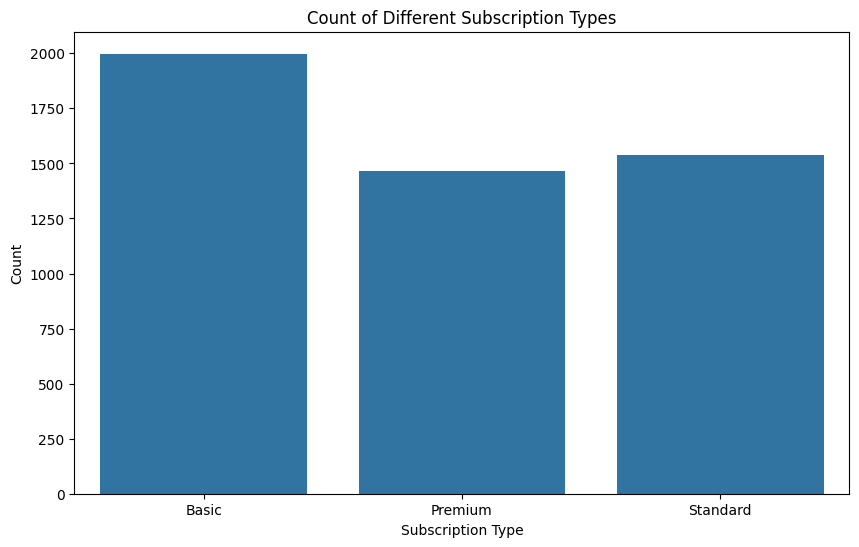

In [119]:
plt.figure(figsize=(10, 6))
sns.countplot(data=concatenation, x='Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title('Count of Different Subscription Types')
plt.show()


## **Visualizing Subscription Type Distribution Using a Pie Chart**

1. **Counting Subscription Types**:  
   - `concatenation['Subscription Type'].value_counts()` counts the occurrences of each unique subscription type in the dataset.  

2. **Setting Figure Size**:  
   - `plt.figure(figsize=(8, 8))` ensures that the pie chart is displayed in a clear and proportional format.  

3. **Creating the Pie Chart**:  
   - `plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)`  
     - `subscription_counts` provides the values for the pie chart.  
     - `labels=subscription_counts.index` assigns category labels.  
     - `autopct='%1.1f%%'` displays percentages with one decimal precision.  
     - `startangle=140` rotates the chart for better readability.  

4. **Adding Title**:  
   - `plt.title('Distribution of Subscription Types')` provides a meaningful title to the visualization.  

5. **Displaying the Pie Chart**:  
   - `plt.show()` renders the pie chart.  

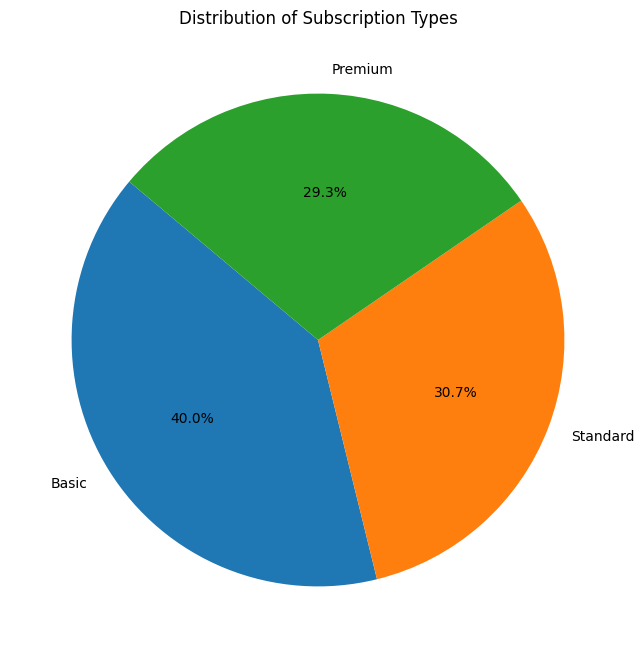

In [120]:
# Count the occurrences of each subscription type
subscription_counts = concatenation['Subscription Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subscription Types')
plt.show()


## **Box Plot of Monthly Revenue by Subscription Type**

1. **Setting Figure Size**:  
   - `plt.figure(figsize=(10, 6))` ensures that the plot is large enough for clear visualization.  

2. **Creating a Box Plot**:  
   - `sns.boxplot(data=concatenation, x='Subscription Type', y='Monthly Revenue')` generates a box plot to show the distribution of monthly revenue for each subscription type.  

3. **Customizing the Plot**:  
   - `plt.xlabel('Subscription Type')` labels the x-axis with different subscription categories.  
   - `plt.ylabel('Monthly Revenue')` labels the y-axis with revenue values.  
   - `plt.title('Box Plot of Monthly Revenue by Subscription Type')` gives the plot a meaningful title.  

4. **Displaying the Plot**:  
   - `plt.show()` renders the box plot.  

### **Interpretation of the Box Plot**:  
- The box plot provides insights into the spread, median, and presence of outliers in monthly revenue for different subscription types.  
- The central box represents the interquartile range (IQR), while the whiskers show the overall distribution.  
- Any points outside the whiskers indicate potential outliers.  


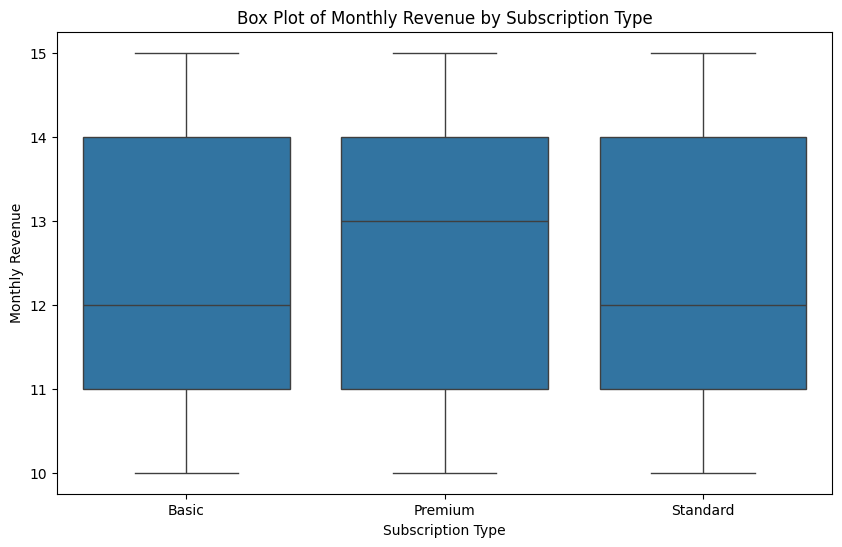

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=concatenation, x='Subscription Type', y='Monthly Revenue')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')
plt.title('Box Plot of Monthly Revenue by Subscription Type')
plt.show()


## **Plotting a Sine Wave Using Matplotlib**

1. **Generating Data for the Sine Wave**:  
   - `x = np.linspace(0, 2 * np.pi, 1000)`  
     - Creates an array of 1000 evenly spaced values between 0 and \(2\pi\).  
   - `y = np.sin(x)`  
     - Computes the sine of each \(x\) value to generate the corresponding \(y\) values.  

2. **Setting Figure Size**:  
   - `plt.figure(figsize=(10, 6))` ensures the plot is large enough for clarity.  

3. **Plotting the Sine Wave**:  
   - `plt.plot(x, y, label='Sine Wave')`  
     - Plots the sine wave with \(x\) values on the x-axis and \(y\) values on the y-axis.  
     - Adds a label for the legend.  

4. **Customizing the Plot**:  
   - `plt.xlabel('X')` labels the x-axis.  
   - `plt.ylabel('Y')` labels the y-axis.  
   - `plt.title('Sine Wave')` gives the plot a meaningful title.  
   - `plt.legend()` displays the legend for the plotted sine wave.  
   - `plt.grid(True)` adds a grid for better visualization.  

5. **Displaying the Plot**:  
   - `plt.show()` renders the sine wave.  


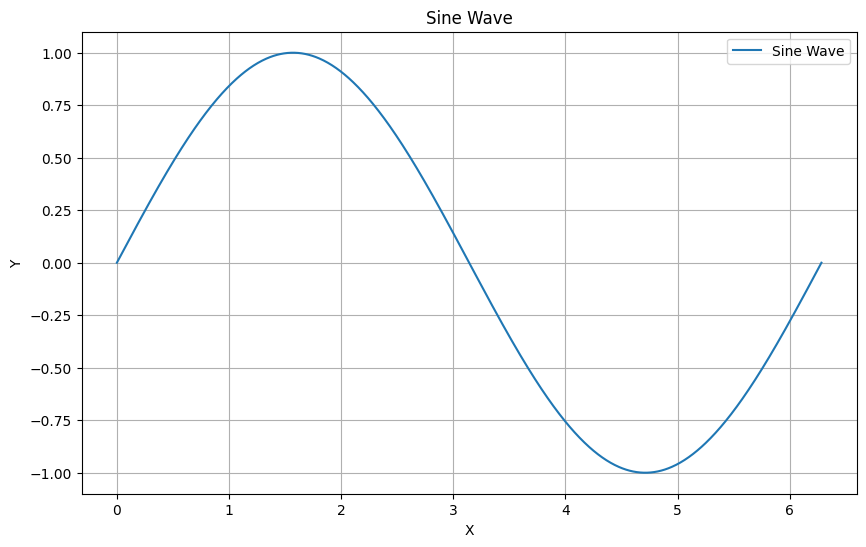

In [122]:
# Generate data for the sine wave
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Plot the sine wave
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sine Wave')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Wave')
plt.legend()
plt.grid(True)
plt.show()


## **Calculating Skewness Using SciPy**

1. **Importing the Required Function**:  
   - `from scipy.stats import skew` imports the `skew` function from the `scipy.stats` module to measure skewness.  

2. **Calculating Skewness**:  
   - `x_skewness = skew(x)` computes the skewness of the `x` dataset.  
   - `y_skewness = skew(y)` computes the skewness of the `y` dataset.  

3. **Printing the Results**:  
   - `print("Skewness of x:", x_skewness)` displays the skewness value for `x`.  
   - `print("Skewness of y:", y_skewness)` displays the skewness value for `y`.  

### **Understanding Skewness**:  
- **Skewness measures the asymmetry of a dataset's distribution**:  
  - If **skewness > 0**, the distribution is right-skewed (positive skew).  
  - If **skewness < 0**, the distribution is left-skewed (negative skew).  
  - If **skewness ≈ 0**, the distribution is approximately symmetric.  

### **Expected Outcome**:  
- The `x` values are evenly spaced from 0 to \(2\pi\), so their distribution should be approximately symmetric, leading to a skewness near **0**.  
- The `y` values represent a sine wave, which is symmetric over a full cycle. Thus, its skewness should also be close to **0**.  


In [123]:
from scipy.stats import skew

# Calculate skewness
x_skewness = skew(x)
y_skewness = skew(y)
print("Skewness of x:", x_skewness)
print("Skewness of y:", y_skewness)


Skewness of x: 4.558802820290694e-16
Skewness of y: 0.0



## **Filtering Data Based on a Threshold**

1. **Defining a Threshold**:  
   - `threshold = 0.5` sets a value to filter the dataset.  
   - Only values greater than **0.5** will be retained in the filtered dataset.  

2. **Filtering the Data**:  
   - `filtered_data = y_filtered[y_filtered > threshold]`  
     - This selects only the values in `y_filtered` that are greater than the specified threshold.  

3. **Printing the Filtered Data**:  
   - `print(filtered_data)` displays the subset of data where values exceed the threshold.  

### **Understanding the Threshold Filtering**:  
- If `y_filtered` contains values from a sine wave, this filtering keeps only the positive values above **0.5**, removing all values below or equal to **0.5**.  
- The filtered dataset may contain fewer elements than the original dataset.  

### **Expected Outcome**:  
- If `y_filtered` represents a sine wave (`y = sin(x)`), only the peak values in the positive half-cycle (from around \( x = \pi/6 \) to \( x = 5\pi/6 \)) will be retained.  

In [124]:
# Define a threshold
threshold = 0.5

y_filtered = y.copy()

# Filter the data
filtered_data = y_filtered[y_filtered > threshold]
print(filtered_data)

[0.50407956 0.5095015  0.51490329 0.52028471 0.52564555 0.5309856
 0.53630464 0.54160247 0.54687888 0.55213365 0.55736658 0.56257746
 0.56776609 0.57293225 0.57807576 0.5831964  0.58829397 0.59336826
 0.59841909 0.60344624 0.60844952 0.61342873 0.61838368 0.62331417
 0.62822    0.63310098 0.63795691 0.64278761 0.64759288 0.65237254
 0.65712639 0.66185424 0.66655591 0.67123122 0.67587997 0.68050199
 0.68509709 0.68966509 0.69420581 0.69871906 0.70320468 0.70766248
 0.71209229 0.71649392 0.72086722 0.725212   0.72952809 0.73381533
 0.73807353 0.74230254 0.74650219 0.75067231 0.75481273 0.75892329
 0.76300383 0.76705419 0.77107421 0.77506373 0.77902259 0.78295063
 0.7868477  0.79071364 0.7945483  0.79835154 0.80212319 0.80586312
 0.80957116 0.81324719 0.81689104 0.82050258 0.82408166 0.82762814
 0.83114188 0.83462275 0.8380706  0.8414853  0.84486671 0.8482147
 0.85152914 0.85480989 0.85805683 0.86126983 0.86444876 0.86759349
 0.8707039  0.87377987 0.87682128 0.879828   0.88279991 0.885736


## **Removing Outliers Using the Interquartile Range (IQR) Method**

### **1. Calculate Quartiles (Q1 & Q3)**
- **Q1 (25th percentile)**: `Q1 = np.percentile(y_filtered, 25)`
  - This is the value below which 25% of the data falls.
- **Q3 (75th percentile)**: `Q3 = np.percentile(y_filtered, 75)`
  - This is the value below which 75% of the data falls.

### **2. Compute the Interquartile Range (IQR)**
- `IQR = Q3 - Q1`
  - The **Interquartile Range (IQR)** is the difference between Q3 and Q1.
  - It represents the middle **50%** of the dataset.

### **3. Define Outlier Boundaries**
- **Lower Bound**: `lower_bound = Q1 - 1.5 * IQR`
  - Any value below this is considered an outlier.
- **Upper Bound**: `upper_bound = Q3 + 1.5 * IQR`
  - Any value above this is considered an outlier.

### **4. Filter the Data to Remove Outliers**
- `y_filtered_no_outliers = y_filtered[(y_filtered >= lower_bound) & (y_filtered <= upper_bound)]`
  - This keeps only the values that fall within the defined bounds, removing potential outliers.

### **5. Print the Filtered Data**
- `print("Data without outliers:", y_filtered_no_outliers)`

---

### **Why Use the IQR Method?**
- The **IQR method is robust to extreme values** compared to standard deviation-based filtering.
- It is commonly used in **data preprocessing and outlier detection**.

### **Expected Outcome**
- Values that lie **significantly higher or lower** than the rest of the dataset will be **removed**.
- If `y_filtered` represents a sine wave, the dataset should ideally have **very few or no outliers**, as sine values are naturally bounded between -1 and 1.

In [125]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(y_filtered, 25)
Q3 = np.percentile(y_filtered, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
y_filtered_no_outliers = y_filtered[(y_filtered >= lower_bound) & (y_filtered <= upper_bound)]
print("Data without outliers:", y_filtered_no_outliers)

Data without outliers: [ 0.00000000e+00  6.28943332e-03  1.25786178e-02  1.88673048e-02
  2.51552454e-02  3.14421909e-02  3.77278927e-02  4.40121020e-02
  5.02945704e-02  5.65750492e-02  6.28532900e-02  6.91290446e-02
  7.54020646e-02  8.16721019e-02  8.79389084e-02  9.42022363e-02
  1.00461838e-01  1.06717465e-01  1.12968871e-01  1.19215809e-01
  1.25458030e-01  1.31695289e-01  1.37927338e-01  1.44153931e-01
  1.50374822e-01  1.56589764e-01  1.62798512e-01  1.69000820e-01
  1.75196443e-01  1.81385136e-01  1.87566653e-01  1.93740751e-01
  1.99907185e-01  2.06065711e-01  2.12216086e-01  2.18358066e-01
  2.24491409e-01  2.30615871e-01  2.36731210e-01  2.42837185e-01
  2.48933554e-01  2.55020076e-01  2.61096510e-01  2.67162616e-01
  2.73218154e-01  2.79262883e-01  2.85296566e-01  2.91318963e-01
  2.97329837e-01  3.03328948e-01  3.09316061e-01  3.15290939e-01
  3.21253344e-01  3.27203041e-01  3.33139795e-01  3.39063370e-01
  3.44973534e-01  3.50870051e-01  3.56752688e-01  3.62621214e-01
  


## **Removing Outliers Using the Z-Score Method**

### **1. Calculate Z-Scores**
- `z_scores = zscore(y_filtered_no_outliers)`
  - The **Z-score** standardizes data by measuring how many standard deviations a value is from the mean.
  - **Formula**:  
    \[
    Z = \frac{(X - \mu)}{\sigma}
    \]
    where:
    - \( X \) is the data point.
    - \( \mu \) is the mean of the dataset.
    - \( \sigma \) is the standard deviation.

### **2. Define the Z-Score Threshold**
- `z_threshold = 3`
  - Data points with Z-scores **greater than 3 or less than -3** are considered outliers.

### **3. Filter the Data to Remove Outliers**
- `y_no_outliers_zscore = y_filtered_no_outliers[np.abs(z_scores) < z_threshold]`
  - This **keeps only values with a Z-score between -3 and 3**, removing extreme outliers.

### **4. Print the Filtered Data**
- `print("Data without outliers using z-score:", y_no_outliers_zscore)`

---

### **Why Use the Z-Score Method?**
- **Best for normally distributed data**:  
  - The Z-score method assumes a **Gaussian (bell-curve) distribution**.
- **More sensitive to extreme values**:  
  - Unlike the **IQR method**, which removes outliers based on quartiles, the Z-score method is useful when outliers are **far from the mean**.

### **Expected Outcome**
- Data points that **deviate significantly (above 3 standard deviations)** from the mean will be **removed**.
- If `y_filtered_no_outliers` contains values from a **sine wave**, most values will likely be within range, as sine waves are **naturally bounded between -1 and 1**.

In [126]:
# Calculate the z-scores of the data
z_scores = zscore(y_filtered_no_outliers)

# Define a threshold for z-scores
z_threshold = 3

# Filter the data to remove outliers
y_no_outliers_zscore = y_filtered_no_outliers[np.abs(z_scores) < z_threshold]
print("Data without outliers using z-score:", y_no_outliers_zscore)

Data without outliers using z-score: [ 0.00000000e+00  6.28943332e-03  1.25786178e-02  1.88673048e-02
  2.51552454e-02  3.14421909e-02  3.77278927e-02  4.40121020e-02
  5.02945704e-02  5.65750492e-02  6.28532900e-02  6.91290446e-02
  7.54020646e-02  8.16721019e-02  8.79389084e-02  9.42022363e-02
  1.00461838e-01  1.06717465e-01  1.12968871e-01  1.19215809e-01
  1.25458030e-01  1.31695289e-01  1.37927338e-01  1.44153931e-01
  1.50374822e-01  1.56589764e-01  1.62798512e-01  1.69000820e-01
  1.75196443e-01  1.81385136e-01  1.87566653e-01  1.93740751e-01
  1.99907185e-01  2.06065711e-01  2.12216086e-01  2.18358066e-01
  2.24491409e-01  2.30615871e-01  2.36731210e-01  2.42837185e-01
  2.48933554e-01  2.55020076e-01  2.61096510e-01  2.67162616e-01
  2.73218154e-01  2.79262883e-01  2.85296566e-01  2.91318963e-01
  2.97329837e-01  3.03328948e-01  3.09316061e-01  3.15290939e-01
  3.21253344e-01  3.27203041e-01  3.33139795e-01  3.39063370e-01
  3.44973534e-01  3.50870051e-01  3.56752688e-01  3.6

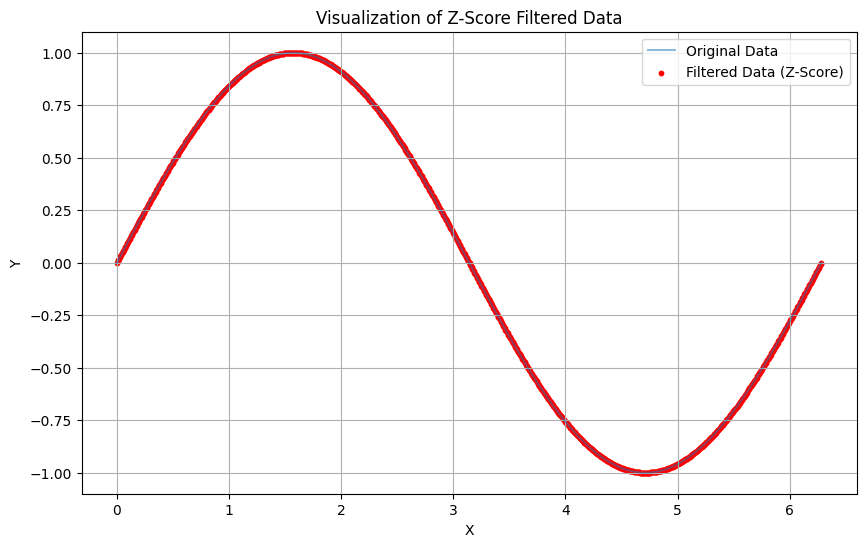

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data', alpha=0.5)
plt.scatter(x[np.abs(z_scores) < z_threshold], y_no_outliers_zscore, color='red', label='Filtered Data (Z-Score)', s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Z-Score Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


### **Label Encoding:**  
Label encoding converts categorical data into numerical values by assigning a unique integer to each category (e.g., Red → 0, Blue → 1).  

### **Types of Encoding Techniques:**  
1. Label Encoding  
2. One-Hot Encoding  
3. Ordinal Encoding  
4. Frequency Encoding  
5. Binary Encoding  
6. Target Encoding

In [128]:
# Perform one-hot encoding on the 'Subscription Type' column
one_hot_encoded_data = pd.get_dummies(concatenation, columns=['Subscription Type'])

# Display the first few rows of the one-hot encoded dataset
print(one_hot_encoded_data.head())

   User ID  Monthly Revenue Join Date Last Payment Date         Country   Age  \
0        1             10.0  15-01-22          10-06-23   United States  28.0   
1        2             15.0  05-09-21          22-06-23          Canada  35.0   
2        3             12.0  28-02-23          27-06-23  United Kingdom  42.0   
3        4             12.0  10-07-22          26-06-23       Australia  51.0   
4        5             10.0  01-05-23          28-06-23         Germany  33.0   

   Gender      Device Plan Duration Name  ... Usage Frequency  \
0    Male  Smartphone       1 Month  NaN  ...             NaN   
1  Female      Tablet       1 Month  NaN  ...             NaN   
2    Male    Smart TV       1 Month  NaN  ...             NaN   
3  Female      Laptop       1 Month  NaN  ...             NaN   
4    Male  Smartphone       1 Month  NaN  ...             NaN   

  Purchase History Favorite Genres Devices Used Engagement Metrics  \
0              NaN             NaN          NaN     

### **Train-Test Split:**  
Train-test split is a technique used to divide a dataset into two parts:  
- **Training Set:** Used to train the model (typically 70-80% of the data).  
- **Test Set:** Used to evaluate the model's performance (20-30% of the data).  

It helps prevent overfitting and ensures the model generalizes well to unseen data.

In [129]:
from sklearn.model_selection import train_test_split

# Perform train-test split
z_scores_train_split, z_scores_test_split = train_test_split(z_scores, test_size=0.2, random_state=42)

# Print the sizes of the splits
print("Training set size:", len(z_scores_train_split))
print("Testing set size:", len(z_scores_test_split))

Training set size: 800
Testing set size: 200


### **Scaling:**  
Scaling is the process of normalizing or standardizing numerical data to a specific range or distribution. It ensures that no feature dominates the model due to larger values, improving accuracy and performance.  

### **Types of Scalers:**  
1. Min-Max Scaling: Scales data to a range [0, 1].  
2. Standard Scaling (Z-score): Centers data around mean (0) with unit variance.  
3. Robust Scaling: Uses median and IQR, less sensitive to outliers.  
4. MaxAbs Scaling: Scales by maximum absolute value, keeping sparsity.  
5. Normalizer: Scales individual samples to unit norm.

In [130]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Perform scaling on the training and test data
z_scores_train_scaled = scaler.fit_transform(z_scores_train_split.reshape(-1, 1))
z_scores_test_scaled = scaler.transform(z_scores_test_split.reshape(-1, 1))

# Print the scaled data
print("Scaled training data:", z_scores_train_scaled.flatten())
print("Scaled test data:", z_scores_test_scaled.flatten())

Scaled training data: [ 0.25950054 -0.31277623 -1.33700248 -0.50085991 -1.21263005 -0.80849843
  1.22541818 -0.6910669   0.04200964 -1.26476404  0.56656941  1.10294449
 -0.63580737 -1.2523957  -1.17651454  1.2410124  -1.21953141  1.42249745
 -0.77514998 -1.37135679  1.33759645 -1.41237285 -0.21183349  0.4327471
 -0.85551569  0.01967577 -0.39065384  1.14934112 -0.79745309 -0.32148366
  1.18012499 -0.04286495  0.16673936 -0.64775641  0.29456443  0.27705426
  1.41264585 -0.31713152  1.32982435  1.23217447  0.02861016  1.36410325
 -0.12758011 -1.34991958  1.33452714  0.90125686  0.60323449  0.66325809
  0.7179551   1.385748    0.70246441 -0.06964868 -1.3747341  -0.8696979
  0.84840034  1.27438984 -0.17200068 -0.70661332 -0.65964764  0.0464754
 -1.40955408  0.30766681  0.81577468  1.4150996   1.11136465 -1.0407321
 -1.35264336  0.97186881 -1.0437621   0.96532136  0.08664204  0.96203333
 -0.82674658  1.4225115  -0.20741549  0.08218185  1.34210132 -0.85907405
  0.69467735 -1.38701535 -0.74117

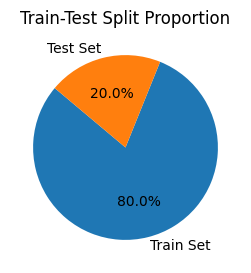

In [131]:
# Calculate the sizes of the train and test sets
train_size = len(z_scores_train_split)
test_size = len(z_scores_test_split)

# Create a pie chart
plt.figure(figsize=(5, 3))
plt.pie([train_size, test_size], labels=['Train Set', 'Test Set'], autopct='%1.1f%%', startangle=140)
plt.title('Train-Test Split Proportion')
plt.show()


### **Pearson Correlation Matrix:**  
The Pearson correlation matrix displays the **linear relationship** between multiple variables. It contains correlation coefficients ranging from **-1 to 1**, indicating the strength and direction of the relationship.  

### **Interpretation:**  
- **+1:** Perfect positive correlation  
- **-1:** Perfect negative correlation  
- **0:** No correlation  

It is used for **feature selection** and detecting multicollinearity.

          Feature1  Feature2
Feature1  1.000000 -0.019996
Feature2 -0.019996  1.000000


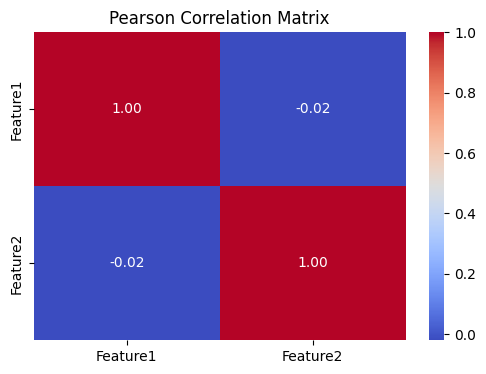

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the array to a DataFrame
data = pd.DataFrame(z_scores_train_scaled_multi, columns=['Feature1', 'Feature2'])

# Compute the Pearson correlation matrix
correlation_matrix = data.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Pearson Correlation Matrix')
plt.show()

### **Confusion Matrix:**  
A confusion matrix is a **performance evaluation tool** used for **classification models**. It displays the **actual vs. predicted values** in a tabular format, helping assess the model’s accuracy.  

### **Components:**  
- **True Positive (TP):** Correctly predicted positive cases.  
- **True Negative (TN):** Correctly predicted negative cases.  
- **False Positive (FP):** Incorrectly predicted positive cases.  
- **False Negative (FN):** Incorrectly predicted negative cases.  

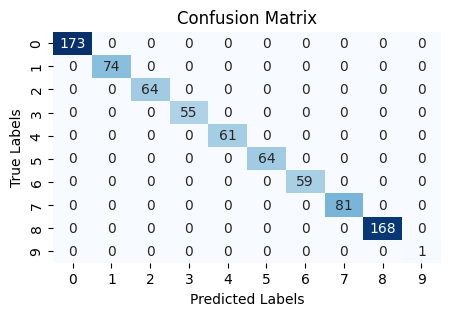

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Fit the Random Forest Classifier with training data
rf_classifier.fit(z_scores_train_scaled_multi, z_scores_train_split_discrete)

# Generate predictions using the Random Forest Classifier
predictions = rf_classifier.predict(z_scores_train_scaled_multi)

# Compute the confusion matrix
conf_matrix = confusion_matrix(z_scores_train_split_discrete, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **Feature Selection:**  
Feature selection is the process of **choosing the most relevant features** from a dataset to improve model performance. It helps reduce **overfitting**, enhances **accuracy**, and speeds up model training by removing irrelevant or redundant features.  

### **Types of Feature Selection Techniques:**  
1. **Filter Methods:**  
   - Select features based on **statistical tests**.  
   - Examples: Correlation, Chi-Square, ANOVA, Mutual Information.  

2. **Wrapper Methods:**  
   - Use **model performance** to evaluate feature subsets.  
   - Examples: Forward Selection, Backward Elimination, Recursive Feature Elimination (RFE).  

3. **Embedded Methods:**  
   - Feature selection occurs during **model training**.  
   - Examples: Lasso Regression, Random Forest, Decision Tree.  

4. **Hybrid Methods:**  
   - Combine **filter and wrapper** techniques for better accuracy.

F-values: [nan]
P-values: [nan]


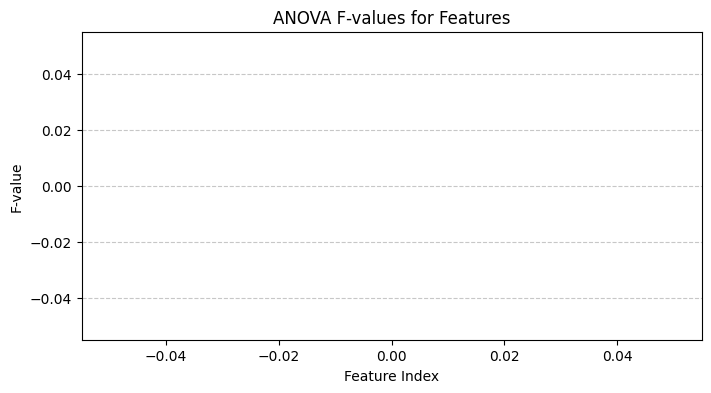

In [ ]:
from sklearn.feature_selection import f_classif

# Perform ANOVA F-test
f_values, p_values = f_classif(z_scores_train_scaled, z_scores_train_split)

# Display the F-values and p-values
print("F-values:", f_values)
print("P-values:", p_values)

# Visualize the F-values
plt.figure(figsize=(5, 3))
plt.bar(range(len(f_values)), f_values, color='skyblue', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('F-value')
plt.title('ANOVA F-values for Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Chi-Square Statistic: 215.55
P-value: 1.8041881265044333e-41


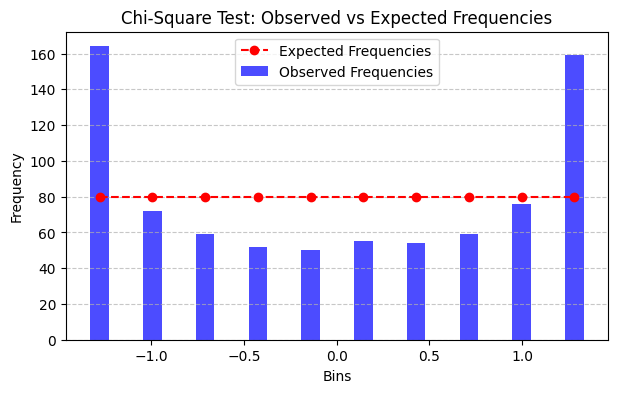

In [135]:
from scipy.stats import chisquare
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins
num_bins = 10

# Create bins and calculate observed frequencies
observed_frequencies, bin_edges = np.histogram(z_scores_train_scaled, bins=num_bins)

# Assume expected frequencies are uniform
expected_frequencies = np.full_like(observed_frequencies, fill_value=np.mean(observed_frequencies))

# Perform the Chi-Square test
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Visualize the observed and expected frequencies
plt.figure(figsize=(7, 4))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.bar(bin_centers, observed_frequencies, width=0.1, label='Observed Frequencies', alpha=0.7, color='blue')
plt.plot(bin_centers, expected_frequencies, label='Expected Frequencies', color='red', linestyle='--', marker='o')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Chi-Square Test: Observed vs Expected Frequencies')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

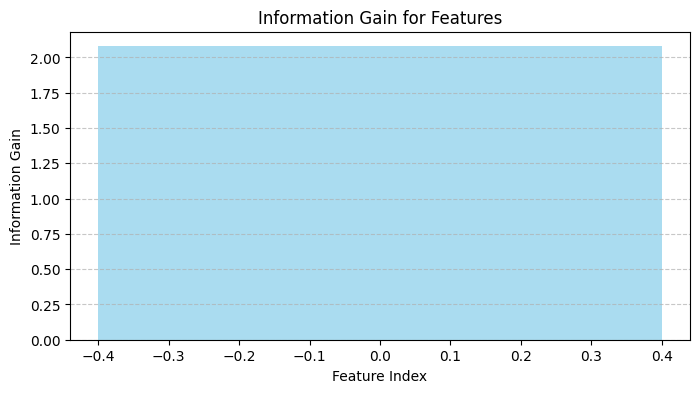

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

import matplotlib.pyplot as plt

# Discretize the target variable
z_scores_train_split_discrete = np.digitize(z_scores_train_split, bins=np.linspace(z_scores_train_split.min(), z_scores_train_split.max(), 10))

# Calculate mutual information (information gain)
info_gain = mutual_info_classif(z_scores_train_scaled, z_scores_train_split_discrete, discrete_features=False)

# Visualize the information gain
plt.figure(figsize=(5, 3))
plt.bar(range(len(info_gain)), info_gain, color='skyblue', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Information Gain')
plt.title('Information Gain for Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(z_scores_train_scaled, z_scores_train_split_discrete)

# Predict on the training data
train_predictions = rf_classifier.predict(z_scores_train_scaled)

# Evaluate the model
accuracy = accuracy_score(z_scores_train_split_discrete, train_predictions)
print("Training Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(z_scores_train_split_discrete, train_predictions))

Training Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        61
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        59
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00       168
          10       1.00      1.00      1.00         1

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



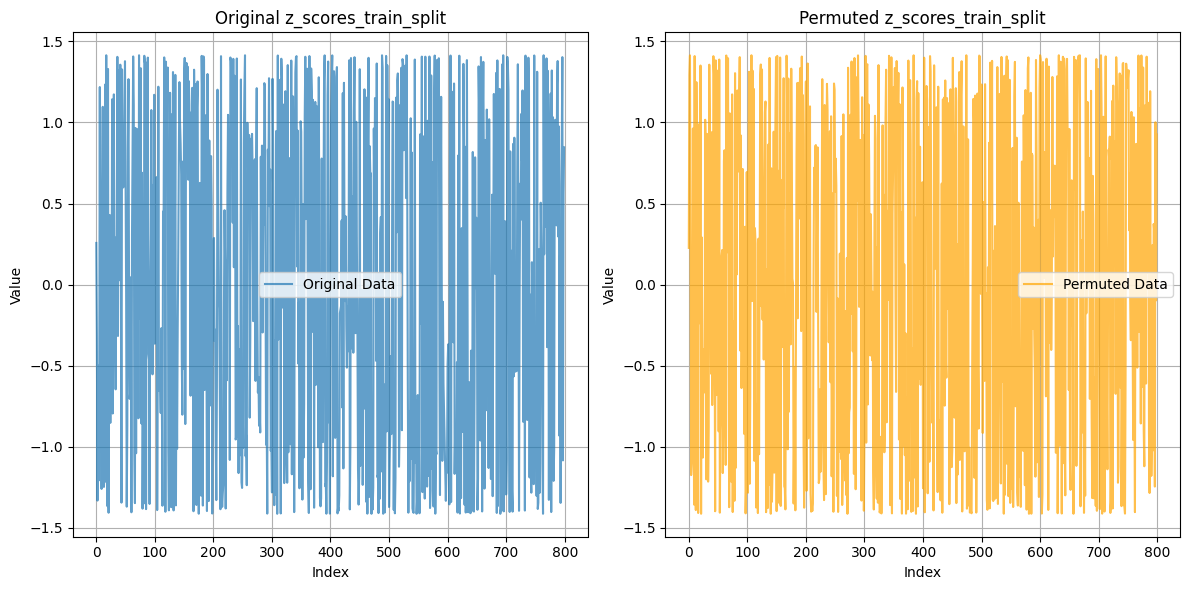

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Perform permutation on z_scores_train_split
permuted_z_scores = np.random.permutation(z_scores_train_split)

# Visualize the original and permuted data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.plot(z_scores_train_split, label='Original Data', alpha=0.7)
plt.title('Original z_scores_train_split')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot permuted data
plt.subplot(1, 2, 2)
plt.plot(permuted_z_scores, label='Permuted Data', alpha=0.7, color='orange')
plt.title('Permuted z_scores_train_split')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

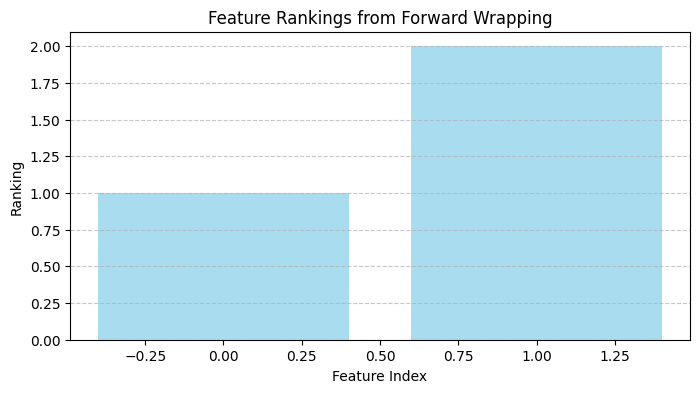

Selected features: [ True False]
Feature rankings: [1, 2]


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform forward feature selection
# Create a dummy second feature for testing
z_scores_train_scaled_multi = np.hstack([z_scores_train_scaled, z_scores_train_scaled**2])

# Perform forward feature selection
sfs = SequentialFeatureSelector(rf_classifier, n_features_to_select=1, direction='forward', scoring='accuracy', cv=5)
sfs.fit(z_scores_train_scaled_multi, z_scores_train_split_discrete)

# Get the support mask
selected_features = sfs.get_support()

# Generate feature rankings manually (1 for selected features, higher numbers for non-selected)
feature_ranking = [1 if selected else 2 for selected in selected_features]

# Visualize the feature rankings
plt.figure(figsize=(5, 3))
plt.bar(range(len(feature_ranking)), feature_ranking, color='skyblue', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Ranking')
plt.title('Feature Rankings from Forward Wrapping')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Selected features:", selected_features)
print("Feature rankings:", feature_ranking)

In [140]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the classifier and the number of features to select
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=1, step=1)

# Fit RFE on the training data
rfe_selector.fit(z_scores_train_scaled_multi, z_scores_train_split_discrete)

# Get the ranking of features
feature_ranking = rfe_selector.ranking_

# Print the feature rankings
print("Feature Rankings:", feature_ranking)

Feature Rankings: [1 2]


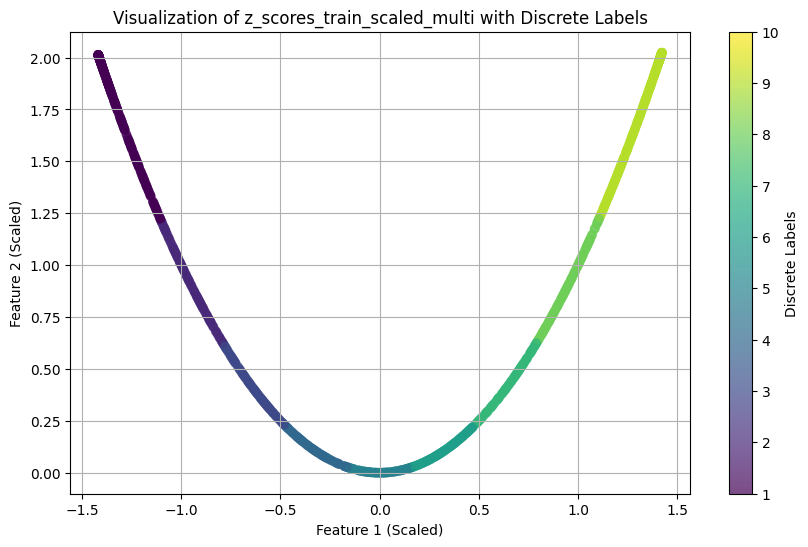

In [141]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    z_scores_train_scaled_multi[:, 0], 
    z_scores_train_scaled_multi[:, 1], 
    c=z_scores_train_split_discrete, 
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(scatter, label='Discrete Labels')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Visualization of z_scores_train_scaled_multi with Discrete Labels')
plt.grid(True)
plt.show()

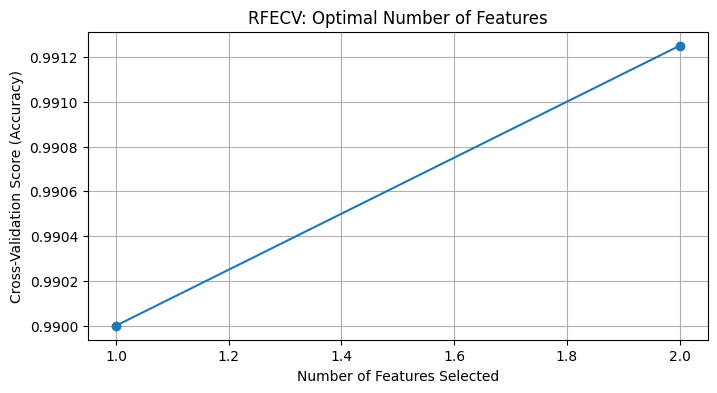

Optimal number of features: 2
Selected feature indices: [ True  True]


In [142]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform RFECV
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy')
rfecv.fit(z_scores_train_scaled_multi, z_scores_train_split_discrete)

# Get the optimal number of features
optimal_features = rfecv.n_features_

# Plot the cross-validation scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (Accuracy)')
plt.title('RFECV: Optimal Number of Features')
plt.grid(True)
plt.show()

print("Optimal number of features:", optimal_features)
print("Selected feature indices:", rfecv.support_)